In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import random

## Our images

Lets see what some of our coins look like.

In [21]:
# Load the json mapper
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    
user_dir = os.path.expanduser('~')
# Iterate through alll the images
base_path = user_dir + "/Desktop/stuff/coin_cnn/data/train/"
data_directories = os.listdir(base_path) # List with all the directories

In [22]:
images = []
# Iterate through every image and gather some data.
for ii, data_dir in enumerate(data_directories):
    data_path = base_path + data_dir
    image_dir = os.listdir(data_path)
    
    for ii, image in enumerate(image_dir):    
        image_path = data_path + '/' + image
        images.append(image_path)

        break # show only the first image per directory  

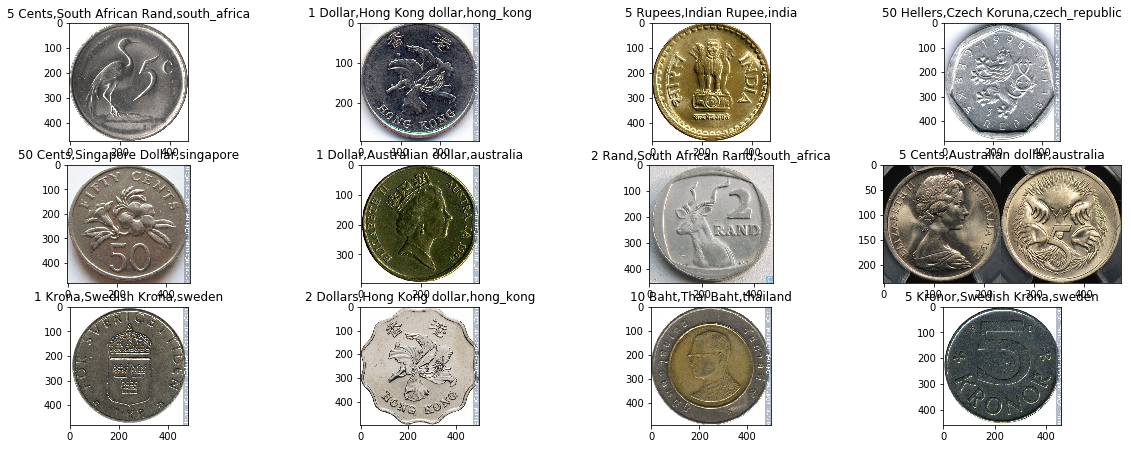

In [23]:
random_idx = [random.randint(1,len(cat_to_name)) for i in range(12)] # Get random indices
images_rand = [images[idx] for idx in random_idx] # Get the images from the random indices

plt.figure(figsize=(20,10))
columns = 4
for i, image in enumerate(images_rand):
    image_id = image.split("/")[-2]
    coin_data = cat_to_name[data_dir].split(",")
    coin_name, coin_currency, country = coin_data[0], coin_data[1], coin_data[2]
    
    plt.subplot(len(images_rand) / columns + 1, columns, i + 1)
    pil_image = Image.open(image)
    plt.imshow(pil_image)
    plt.title(cat_to_name[str(image_id)])

## Create a table
I'll create a table that cointains information about the data:
* coin's image width
* coin's image height
* coin's name
* coin's currency 
* coin's country

I'll iterate through each directory to extract the information for each image and add it to a table.

In [24]:
coins_data = pd.DataFrame(columns=['coin_name', 'currency', 'country', 'image_width', 'image_height', 'image_name'])

# Starting point
coins_data

# Adding a row
#coins_data.loc[1] = np.array(['name', 'euros', 'spain', '304', '234'])

,coin_name,currency,country,image_width,image_height,image_name


In [25]:
df_idx = 1 # Index where we'll append the next row

# Iterate through every image and gather some data.
for data_dir in data_directories:
    data_path = base_path + data_dir
    coin_data = cat_to_name[data_dir].split(",")
    coin_name, coin_currency, country = coin_data[0], coin_data[1], coin_data[2]
    
    image_dir = os.listdir(data_path)

    for ii, image in enumerate(image_dir):
        
        image_path = data_path + '/' + image
        pil_image = Image.open(image_path)
        image_width, image_height = pil_image.size
        
        image_info = [coin_name, coin_currency, country, image_width, image_height, image]
        coins_data.loc[df_idx] = image_info
        
        df_idx = df_idx +1 # Change the index for the next iteration
        
print("total number of images = ", len(coins_data))

total number of images =  8101


In [26]:
coins_data[:10]

,coin_name,currency,country,image_width,image_height,image_name
1,500 Pesos,Chilean Peso,chile,500,495,048__500 Pesos_chile.jpg
2,500 Pesos,Chilean Peso,chile,500,500,035__500 Pesos_chile.jpg
3,500 Pesos,Chilean Peso,chile,500,500,020__500 Pesos_chile.jpg
4,500 Pesos,Chilean Peso,chile,474,474,011__500 Pesos_chile.jpg
5,500 Pesos,Chilean Peso,chile,312,316,056__500 Pesos_chile.jpg
6,500 Pesos,Chilean Peso,chile,499,500,037__500 Pesos_chile.jpg
7,500 Pesos,Chilean Peso,chile,500,494,001__500 Pesos_chile.jpg
8,500 Pesos,Chilean Peso,chile,500,494,031__500 Pesos_chile.jpg
9,500 Pesos,Chilean Peso,chile,474,472,039__500 Pesos_chile.jpg
10,500 Pesos,Chilean Peso,chile,497,500,059__500 Pesos_chile.jpg


## Visualizing our data

### Average image heights and widths

width mean 456.0883841501049
width median 474.0
min_width 175 px , max_width 175 px


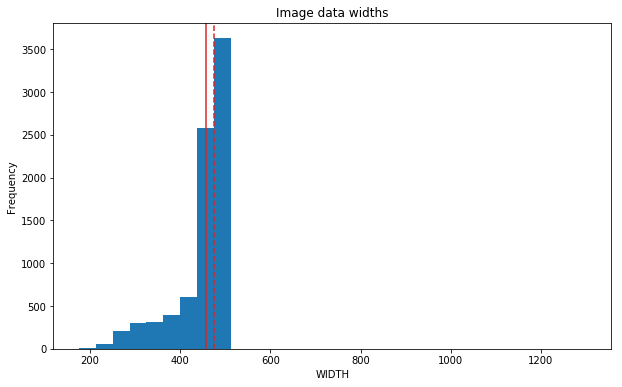

In [27]:

coins_data.image_width.plot(kind="hist", bins=30, figsize=(10,6))
plt.axvline(coins_data.image_width.mean(), c="C3")
plt.axvline(coins_data.image_width.median(), c="C3", linestyle="--")
plt.xlabel("WIDTH")
plt.title("Image data widths")

print("width mean", coins_data.image_width.mean())
print("width median", coins_data.image_width.median())
print("min_width", coins_data.image_width.min(), "px", ", max_width", coins_data.image_width.min(), "px")

height mean 448.56511541784965
height median 476.0
min_height 148 px max_height 1095 px


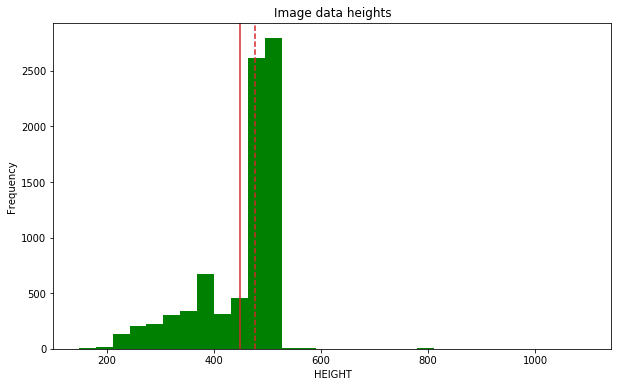

In [28]:
coins_data.image_height.plot(kind="hist", bins=30, color='green', figsize=(10,6))
plt.axvline(coins_data.image_height.mean(), c="C3")
plt.axvline(coins_data.image_height.median(), c="C3", linestyle="--")
plt.title("Image data heights")

plt.xlabel("HEIGHT")
print("height mean", coins_data.image_height.mean())
print("height median", coins_data.image_height.median())
print("min_height", coins_data.image_height.min(), "px", "max_height", coins_data.image_height.max(), "px")

Text(0,0.5,'HEIGHT')

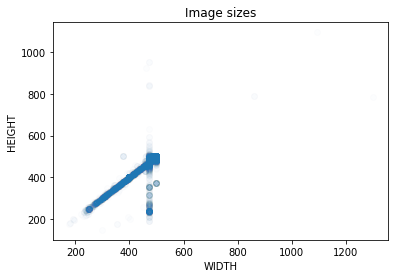

In [29]:
plt.scatter(coins_data.image_width, coins_data.image_height, alpha=0.01)
plt.rcParams["figure.figsize"] = [12, 6]
plt.title("Image sizes")
plt.xlabel("WIDTH")
plt.ylabel("HEIGHT")

From the charts above we can observe that most images fall in between a width and height in between 200px to 500px. The most common widths are around 450px, and most common heights around 450px.

### Coins by currency

For fun lets check how many coins there are per currency

In [30]:
coins_data_simplified = pd.DataFrame(columns=['coin_name', 'currency', 'country'])

for ii in range(len(cat_to_name)):
    idx = str(ii+1)
    coin_data = cat_to_name[idx].split(",")
    coin_name, coin_currency, country = coin_data[0], coin_data[1], coin_data[2]
    
    coin_info = [coin_name, coin_currency, country]
    coins_data_simplified.loc[idx] = coin_info




number of coins mean: 6.59375
number of coins mode: 0    6
dtype: int64


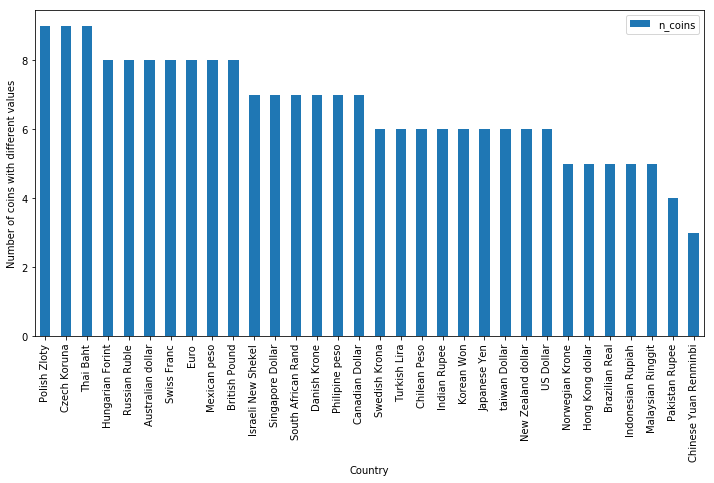

In [31]:

coins_per_country = pd.DataFrame(coins_data_simplified.currency.value_counts())
coins_per_country=coins_per_country.rename(columns = {'currency':'n_coins'})

coins_per_country.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of coins with different values")

print("number of coins mean:", coins_per_country.n_coins.mean())
print("number of coins mode:", coins_per_country.n_coins.mode())